# Basic mathematical operations


    - pixel-wise distances
    - set/logical operations 
    - affine transformations
    - arithmetic operations 
    - intensity transforms (contrast enhancement, log and gamma)
    - pixel statistics, image histogram

## 1. Pixel-wise distances: 

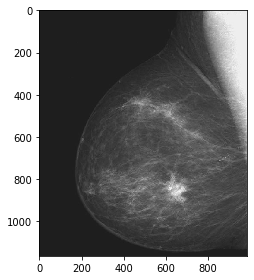

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import skimage as sk # load skimage libraries
from skimage.io import imread

I = sk.io.imread('/image1.tif') # read image using imread function 
sk.io.imshow(I) # visualize image using imshow function
sk.io.show() 
plt.show()

### Euclidean distance between two pixels:

In [ ]:
from scipy.spatial.distance import pdist 


X1 = np.array([10, 10]) # position of pixel 1  (row, col)
X2 = np.array([20, 20]) # position of pixel 2  (row, col)
X = [X1,X2]
Y = pdist(X, 'euclidean')
print('Euclidean distance={}'.format(*Y))

# which is equivalent to:
Y1 = np.sqrt(np.power(X1-X2,2).sum())

print('Y = {} and Y1 = {}'.format(*Y,Y1))

Euclidean distance=14.142135623730951
Y = 14.142135623730951 and Y1 = 14.142135623730951


In [ ]:
## Cityblock distance: 
Y = pdist(X, 'cityblock')
print('Cityblock distance={}'.format(*Y))

# Chessboard distance (Chevichev): 
Y = pdist(X, 'chebyshev')
print('Chessboard distance={}'.format(*Y))


Cityblock distance=20.0
Chessboard distance=10.0


### The euclidean distance transform 

Assigns values of the euclidean distance:

$y_i = \sqrt{\sum_{i=1}^{d} (x_i - b_i)^2}$ 


where $b_i$ is the background point (value 0) with the smallest Euclidean distance to input points $x_i$, and d is the number of dimensions.

In [ ]:
a = np.array(([0,1,1,1,1],
                  [0,0,1,1,1],
                  [0,1,1,1,1],
                  [0,1,1,1,0],
                  [0,1,1,0,0]))

from scipy import ndimage
edt = ndimage.distance_transform_edt(a)
edt

array([[0.        , 1.        , 1.41421356, 2.23606798, 3.        ],
       [0.        , 0.        , 1.        , 2.        , 2.        ],
       [0.        , 1.        , 1.41421356, 1.41421356, 1.        ],
       [0.        , 1.        , 1.41421356, 1.        , 0.        ],
       [0.        , 1.        , 1.        , 0.        , 0.        ]])

## 2. Set and logical operations

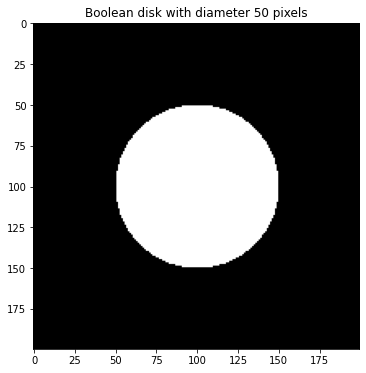

In [ ]:
nrows, ncols = (200,200) # location 
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols / 2
disk_diameter = 50 # diameter in pixels
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 < (disk_diameter)**2) # when the distance is smaller than the diameter, set 1, otherwise set 0

fig = plt.figure(figsize=(6,6))
plt.imshow(outer_disk_mask,cmap=plt.cm.gray)
plt.title('Boolean disk with diameter {} pixels'.format(disk_diameter))
plt.show()



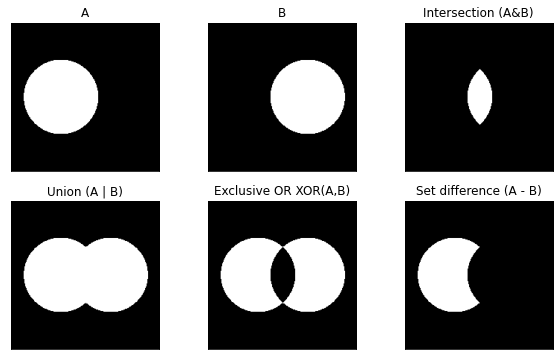

In [ ]:
nrows, ncols = (200,200)
row, col = np.ogrid[:nrows, :ncols]
disk_diameter = 50

cnt_row1, cnt_col1 = nrows / 2, ncols / 3
outer_disk_mask1 = ((row - cnt_row1)**2 + (col - cnt_col1)**2 < (disk_diameter)**2)

cnt_row2, cnt_col2 = nrows / 2, 2*ncols / 3
outer_disk_mask2 = ((row - cnt_row2)**2 + (col - cnt_col2)**2 < (disk_diameter)**2)

# Intersection (logical AND): 
I_and = outer_disk_mask1 & outer_disk_mask2

# Union (logical OR): 
I_or = outer_disk_mask1 | outer_disk_mask2

# Exclusive OR xor(A,B): Pixels that are in A but not in B
I_diff1 = np.logical_xor(outer_disk_mask1, outer_disk_mask2)

# Difference (A-B)=A&(not(B)): Pixels that are in A but not in B
I_diff2 = outer_disk_mask1 & np.logical_not(outer_disk_mask2)

fig = plt.figure(figsize=(10, 6))
plt.subplot(231),plt.imshow(outer_disk_mask1, cmap = 'gray') # 2 rows 3 clumns, the 1st one is...
plt.title('A'), plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(outer_disk_mask2, cmap = 'gray')
plt.title('B'), plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(I_and, cmap = 'gray')
plt.title('Intersection (A&B)'), plt.xticks([]), plt.yticks([])
plt.subplot(234),plt.imshow(I_or, cmap = 'gray')
plt.title('Union (A | B)'), plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(I_diff1, cmap = 'gray')
plt.title('Exclusive OR XOR(A,B)'), plt.xticks([]), plt.yticks([])
plt.subplot(236),plt.imshow(I_diff2, cmap = 'gray')
plt.title('Set difference (A - B)'), plt.xticks([]), plt.yticks([])
plt.show()

## 3. Arithmetic operations 

In [ ]:
I.dtype

dtype('uint8')

In [ ]:
I.max()

255

Convertion between types:

In [ ]:
from skimage import img_as_int,img_as_float

Iint = img_as_int(I)
Ifloat = img_as_float(I)

print('uint8 range = {} - {}'.format(I.min(),I.max()))
print('Int range = {} - {}'.format(Iint.min(),Iint.max()))
print('Float range = {} - {}'.format(Ifloat.min(),Ifloat.max()))



uint8 range = 21 - 255
Int range = 2698 - 32767
Float range = 0.08235294117647059 - 1.0


Image overflow when adding to uint8 images:

In [ ]:
Isum = I + I


What happens is known as overflow: The result is 238+238=476 but encoded as a uint8 results in 476-256 = 220

In [ ]:
print('the values to sum are {} and {}, but the result is = {} '.format(I[0,I.shape[1]-1],I[0,I.shape[1]-1],Isum[0,Isum.shape[1]-1]))


the values to sum are 238 and 238, but the result is = 220 


## 4. Intensity transformations:

## Gamma correction:  

${\displaystyle V_{\text{out}}=A{V_{\text{in}}^{\gamma }}}$, where the non-negative real input value ${\displaystyle V_{\text{in}}}$ is raised to the power ${\displaystyle \gamma }$ and multiplied by the constant A, to get the output value ${\displaystyle V_{\text{out}}}$. In the common case of A = 1, inputs and outputs are typically in the range 0–1.

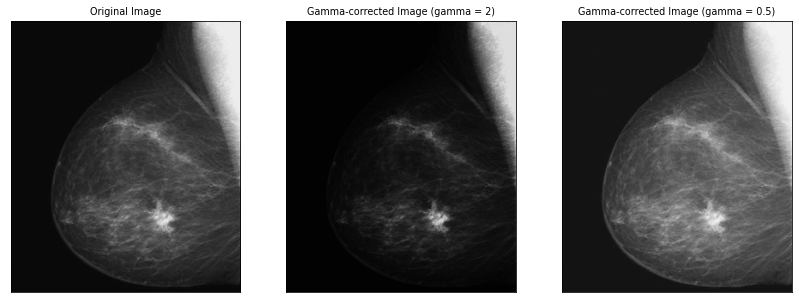

In [ ]:
from skimage import data, exposure, img_as_float
I_gamma_corrected_2 = exposure.adjust_gamma(I, 2)
I_gamma_corrected_05 = exposure.adjust_gamma(I, 0.5)

fig = plt.figure(figsize=(14, 6))
plt.subplot(131),plt.imshow(I, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(I_gamma_corrected_2, cmap = 'gray')
plt.title('Gamma-corrected Image (gamma = 2)'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(I_gamma_corrected_05, cmap = 'gray')
plt.title('Gamma-corrected Image (gamma = 0.5)'), plt.xticks([]), plt.yticks([])
plt.show()



Compare the cummulative distribution of pixel intensities:

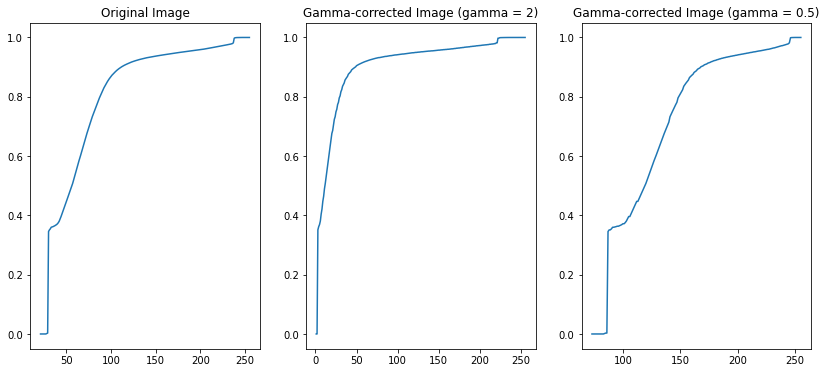

In [ ]:
from skimage import exposure

I_cdf, bins = exposure.cumulative_distribution(I)
I1_cdf, bins1 = exposure.cumulative_distribution(I_gamma_corrected_2)
I2_cdf, bins2 = exposure.cumulative_distribution(I_gamma_corrected_05)

    
fig = plt.figure(figsize=(14, 6))
plt.subplot(131),plt.plot(bins, I_cdf)
plt.title('Original Image')
plt.subplot(132),plt.plot(bins1, I1_cdf)
plt.title('Gamma-corrected Image (gamma = 2)')
plt.subplot(133),plt.plot(bins2, I2_cdf)
plt.title('Gamma-corrected Image (gamma = 0.5)')
plt.show()

## Logarithmic transformation: 

This function transforms the input image pixelwise according to the equation $O = gain*log(1 + I)$ after scaling each pixel to the range 0 to 1. For inverse logarithmic correction, the equation is $O = gain*(2**I - 1)$.

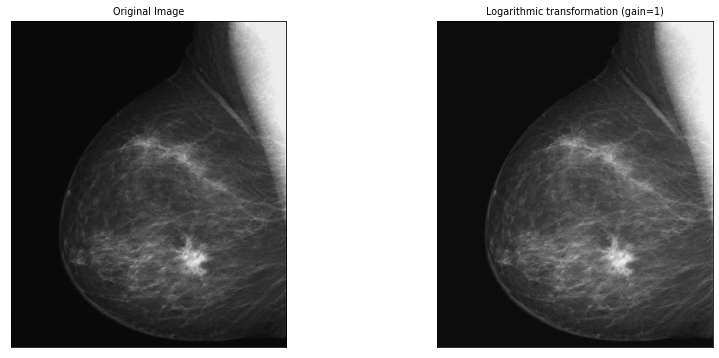

In [ ]:
I_logarithmic_corrected = exposure.adjust_log(I, 1)
fig = plt.figure(figsize=(14, 6))
plt.subplot(121),plt.imshow(I, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(I_logarithmic_corrected, cmap = 'gray')
plt.title('Logarithmic transformation (gain=1)'), plt.xticks([]), plt.yticks([])
plt.show()

## Compare Gamma correction and logarithmic transformation: 

<ipython-input-58-d3693f286a53>:49: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  axes = np.zeros((2, 3), dtype=np.object)


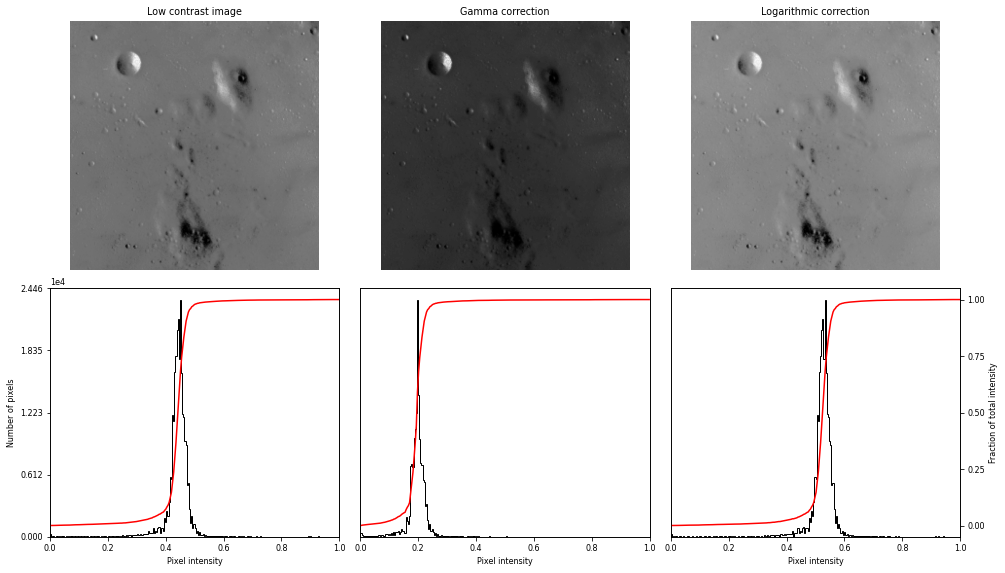

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure

matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = data.moon()

# Gamma
gamma_corrected = exposure.adjust_gamma(img, 2)

# Logarithmic
logarithmic_corrected = exposure.adjust_log(img, 1)

# Display results
fig = plt.figure(figsize=(14, 8))
axes = np.zeros((2, 3), dtype=np.object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(gamma_corrected, axes[:, 1])
ax_img.set_title('Gamma correction')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(logarithmic_corrected, axes[:, 2])
ax_img.set_title('Logarithmic correction')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

## 5. Pixel statistics and image histograms:

Count histogram

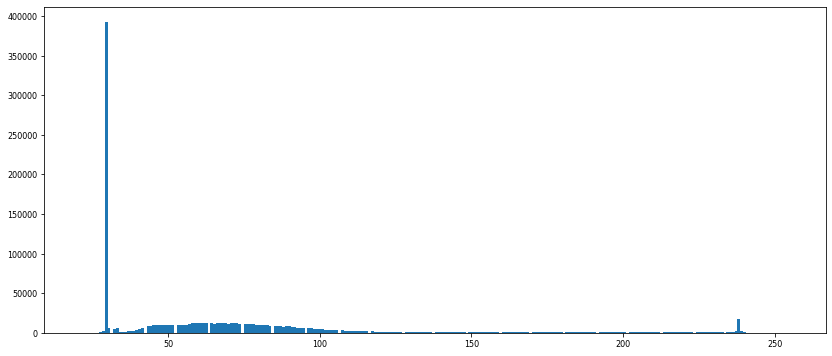

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 

# reshape the uint8 image as 1d array:
v = I.reshape(I.shape[0]*I.shape[1],1)
# keep only pixels with a value higher than zero: 
v = v[v>0]
fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=False)
plt.show()

Count histogram: 

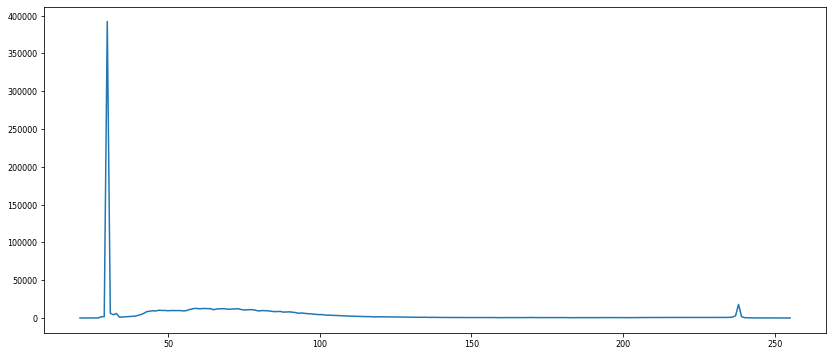

In [ ]:
from skimage import exposure
counts,bins = exposure.histogram(I, nbins=255)
fig = plt.figure(figsize=(14, 6))
plt.plot(bins, counts)
plt.show()

Normalized histogram (probability density function of pixel intensity levels):

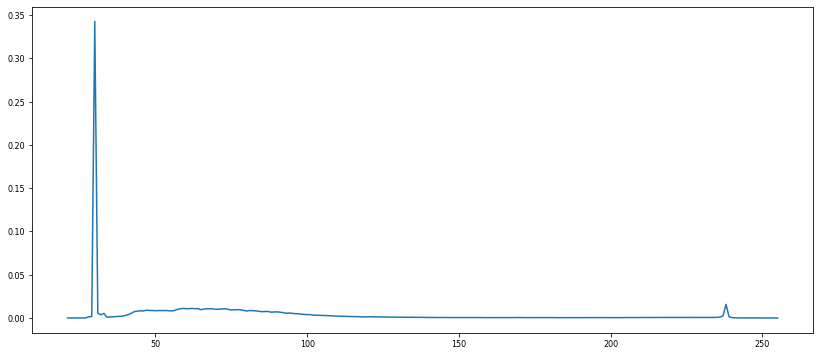

In [ ]:
from skimage import exposure
counts,bins = exposure.histogram(I, nbins=255)
p = counts/(I.shape[0]*I.shape[1])
fig = plt.figure(figsize=(14, 6))
plt.plot(bins, p)
plt.show()

check that the area over the pdf is 1 (normalized):

In [ ]:
p.sum()

1.0

### Global mean, median and standard deviation of an image:

In [ ]:
print('Global mean of the image is = {}'.format(v.mean()))
print('Global std of the image is = {}'.format(v.std()))
print('Global median of the image is = {}'.format(np.median(v)))


Global mean of the image is = 66.63115954935323
Global std of the image is = 46.32668610854266
Global median of the image is = 57.0
